<a href="https://colab.research.google.com/github/hartjensen/SocialMediaAddiction/blob/main/Assignment9ADA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Impact of Social Media Addicion in Students**:

 It's no secret that social media has a negative impact on the lives of users and younger groups are at a higher risk of influence.
This analysis uses a survey of students to identify which areas of life are most impacted due to their social media use. The dataset can be found on kaggle https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships. It contains almost 800 responses from students aged 16-25 enrolled as students around the world. Throughout my progress I've found that as time spent on social media rises, mental health, and sleep both decline. Going further I want to see which genders and more impacted by time spent online and what platforms have a higher chance of addiction.

Import libraries

# New Section

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Creates the dataframe by reading the cvs file from github repository.

In [ ]:
df = pd.read_csv("https://hartjensen.github.io/SocialMediaAddiction/SSMAddiction.csv")
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


Clean the dataset by droping duplicates, nulls and the coloum "Relationship_Status" as it's not relevant to my project.

In [ ]:
df.dropna()
df.drop_duplicates()
df.drop(columns=['Relationship_Status'])

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,2,4


I created a new column that takes the Addiction Score of the students and divides them into groups based on their addiction level.

In [ ]:
conditions = [(df['Addicted_Score'] > 7),
              (df['Addicted_Score'] > 4) & (df['Addicted_Score'] <= 7),
              (df['Addicted_Score'] <= 4)]

values = ['High', 'Medium', 'Low']

df['Addiction_Level'] = np.select(conditions, values, default='Null')
df

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Addiction_Level
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,High
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,Low
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,High
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,Low
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5,Medium
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9,High
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7,Medium
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4,Low


I then created a new dataframe to find the average mental health score based on addiction levels of the students.

In [ ]:
avgMH = (df.groupby('Addiction_Level', as_index=False)['Mental_Health_Score'].mean())
avgMH

,Addiction_Level,Mental_Health_Score
0,High,4.974874
1,Low,7.980000
2,Medium,6.408867


This is a python version of the barchart I made in RStudio.

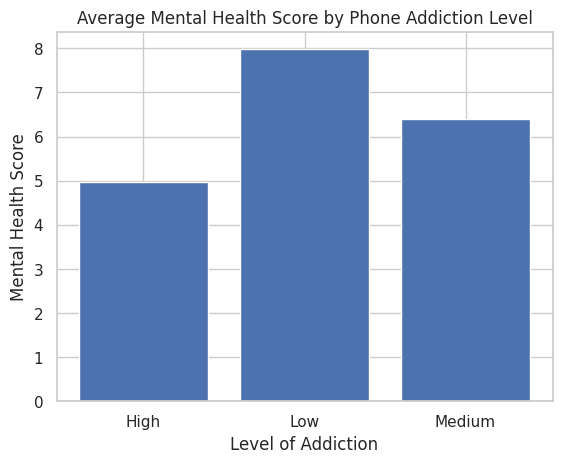

In [ ]:
plt.bar(avgMH['Addiction_Level'], avgMH['Mental_Health_Score'])
plt.title('Average Mental Health Score by Phone Addiction Level')
plt.xlabel('Level of Addiction')
plt.ylabel('Mental Health Score')
plt.show()

I used seaborn to update my previous bar chart.

/tmp/ipython-input-1522611774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mental_Health_Score', y='Addiction_Level', data=avgMH, orient='h', palette='rocket_r')


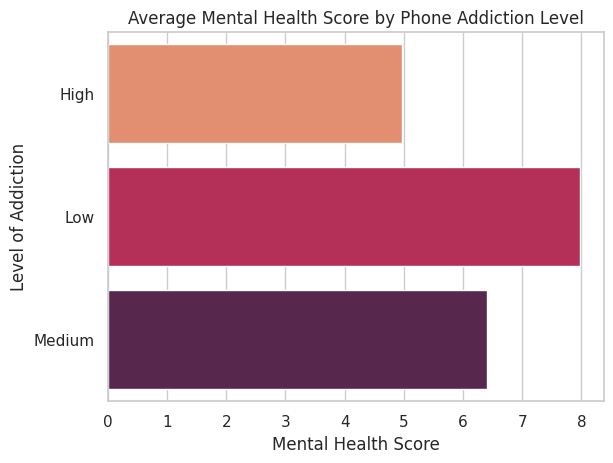

In [ ]:
sns.set_theme(style="whitegrid")
sns.barplot(x='Mental_Health_Score', y='Addiction_Level', data=avgMH, orient='h', palette='rocket_r')

plt.title('Average Mental Health Score by Phone Addiction Level')
plt.xlabel('Mental Health Score')
plt.ylabel('Level of Addiction')


plt.show()


The histogram below shows the distribution of self reported addiction scores in surveyed students.

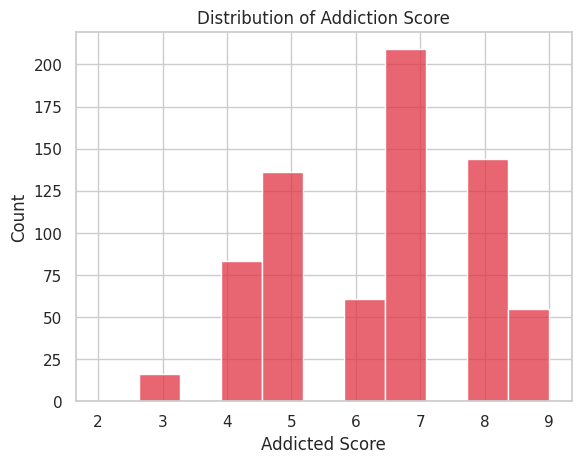

In [ ]:
sns.histplot(data = df, x ='Addicted_Score',  color=sns.color_palette("rocket_r", 6)[2])
plt.title("Distribution of Addiction Score")
plt.xlabel('Addicted Score')
plt.show()



My hypothesis is that students have more conflicts based on how much time they spend online. To test that I ran a correlation test with the results below. The high correlation suggests a strong relationship between the two. The p-value is very close to zero meaning it's statistcally significant.

In [ ]:
from scipy import stats

r, p = stats.pearsonr(df['Avg_Daily_Usage_Hours'], df['Conflicts_Over_Social_Media'])
print(f"The correlation coefficent is {r:.2f}, with a p-value of {p}")

The correlation coefficent is 0.80, with a p-value of 2.901348142311194e-161


To calculate the k-means cluster I first charted the relationship between Mental Health and Addiction Scores. There are some groupings that I can use as clusters.

<Axes: xlabel='Mental_Health_Score', ylabel='Addicted_Score'>

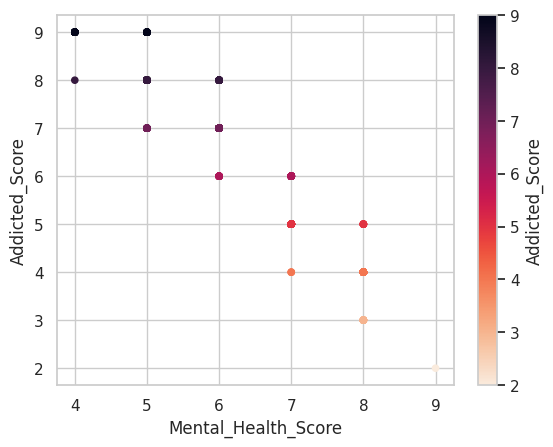

In [ ]:
df.plot.scatter(x='Mental_Health_Score', y='Addicted_Score', c= 'Addicted_Score', cmap='rocket_r')

Set the number of clusters to three, and identified the centers of those clusters.

In [ ]:
k = 3
centers = [(5, 8), (7, 6), (8, 3)]

In [ ]:
data = df[['Mental_Health_Score','Addicted_Score']][1:]
data

,Mental_Health_Score,Addicted_Score
1,8,3
2,5,9
3,7,4
4,6,7
5,4,9
...,...,...
700,7,5
701,4,9
702,6,7
703,8,4


Dist creates an empty array that will keep track of the distance between each point and the centers of each cluster. The distance that is the shortest from each point to the center will then become that points grouping.

In [ ]:
dist = np.empty((data.shape[0], k));
for i in range(k):
  dist[:, i] = np.sum((data - centers[i])**2, axis=1)

data["cluster"] = np.argmin(dist, axis=1)

centers = data.groupby("cluster").mean()


Plots the clusters showing the relationship between the levels of addiction and mental health.

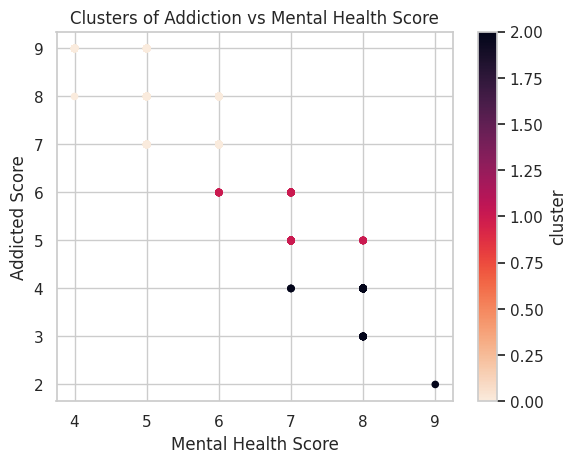

In [ ]:
sns.set_theme(style="whitegrid")
data.plot.scatter(x='Mental_Health_Score', y='Addicted_Score', c='cluster', cmap='rocket_r')
plt.title("Clusters of Addiction vs Mental Health Score")
plt.xlabel('Mental Health Score')
plt.ylabel('Addicted Score')
plt.show()


In [ ]:

np.sum(np.abs(data["cluster"] - data["cluster"]))

np.int64(0)

Install Spark

In [ ]:
#!pip install pyspark
#spark = SparkSession.builder.appName("SSMA").getOrCreate()
#df2 = spark.createDataFrame(df)
#df2.show(10)
#df2.orderBy('Addicted_Score', ascending=False).show(10)



**Preparing data for classification**

In [ ]:
df2 = df.copy()

#convert the label to numerical of increasing severity
df2['Addiction_Level'] = df2['Addiction_Level'].map({
    'Low': 0,
    'Medium': 1,
    'High': 2
    })

#Normalize data by dividing by the mac
df2['Avg_Daily_Usage_Hours'] = df2['Avg_Daily_Usage_Hours'] / df2['Avg_Daily_Usage_Hours'].max()
df2['Mental_Health_Score'] = df2['Mental_Health_Score'] / df2['Mental_Health_Score'].max()




,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Addiction_Level
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,High
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3,Low
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9,High
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4,Low
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5,Medium
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9,High
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7,Medium
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4,Low


In [ ]:
from sklearn.model_selection import train_test_split

#set which data we'll be using for the training
X = df2[['Avg_Daily_Usage_Hours', 'Mental_Health_Score']]
y = df2['Addiction_Level']

#split data 70% traing and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

**Implementing k-nearest neighbor functions**

In [ ]:
from collections import Counter

#function to calculate elucidean distance
def euclidean_distance(x1, x2):
  return np.sqrt(np.sum((x1 - x2)**2))

#function to test and train using k nearest neighbor
def predict(X_train, y_train, x_test, k):
  distances = [euclidean_distance(x_test, x) for x in X_train]
  k_indices = np.argsort(distances)[:k]
  k_nearest_labels = [y_train.iloc[i] for i in k_indices]
  most_common = Counter(k_nearest_labels).most_common(1)
  return most_common[0][0]

**Classifies and tests the data**

In [ ]:
#calls the prediction function
y_predic = [predict(X_train.values, y_train, x, k = 5) for x in X_test.values]

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

#creates confusion matrix and calculates scores
cm = confusion_matrix(y_test, y_predic)
print(f'Confusion Matrix: \n {cm}')
print(f'Accuracy Score: {accuracy_score(y_test, y_predic)}')
FN = cm.sum(axis=1) - np.diag(cm)
FP = cm.sum(axis=0) - np.diag(cm)
TN = cm.sum() - (FP + FN + np.diag(cm))
FNR = FN / (FN + np.diag(cm))
FPR = FP / (FP + TN)
print(f'False Negative Rate: {FNR}')
print(f'False Positive Rate: {FPR}')
print(f'Precision Score: {precision_score(y_test, y_predic, average='macro')}')
print(f'Recall Score: {recall_score(y_test, y_predic, average='macro')}')

Confusion Matrix: 
 [[ 24   2   0]
 [  2 118   2]
 [  0  10  54]]
Accuracy Score: 0.9245283018867925
False Negative Rate: [0.07692308 0.03278689 0.15625   ]
False Positive Rate: [0.01075269 0.13333333 0.01351351]
Precision Score: 0.9316849816849818
Recall Score: 0.9113466792770071


In [ ]:
df2['Affects_Academic_Performance'].unique()

array(['Yes', 'No'], dtype=object)

**Converts the Affects_Academic_Performance to a binary coloum**

In [ ]:
#To correctly show the negative correlation here, responses of Yes to Affects Academic Performance will be converted to 0 as it's a negative response
df2['Affects_Academic_Performance'] = df2['Affects_Academic_Performance'].map({
    'Yes': 0,
    'No': 1
    })

df2

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Addiction_Level
0,1,19,Female,Undergraduate,Bangladesh,0.611765,Instagram,0,6.5,0.666667,In Relationship,3,8,2
1,2,22,Male,Graduate,India,0.247059,Twitter,1,7.5,0.888889,Single,0,3,0
2,3,20,Female,Undergraduate,USA,0.705882,TikTok,0,5.0,0.555556,Complicated,4,9,2
3,4,18,Male,High School,UK,0.352941,YouTube,1,7.0,0.777778,Single,1,4,0
4,5,21,Male,Graduate,Canada,0.529412,Facebook,0,6.0,0.666667,In Relationship,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,0.552941,TikTok,1,7.2,0.777778,In Relationship,2,5,1
701,702,23,Male,Graduate,Russia,0.800000,Instagram,0,5.9,0.444444,Single,5,9,2
702,703,21,Female,Undergraduate,China,0.658824,WeChat,0,6.7,0.666667,In Relationship,3,7,1
703,704,24,Male,Graduate,Japan,0.505882,Twitter,1,7.5,0.888889,Single,2,4,0


**Creating a barchart to represent negative and positive correlation between increased social media use and lifestyle factors**

Sleep_Hours_Per_Night -0.7905824554799916
Conflicts_Over_Social_Media 0.8045823292245049
Mental_Health_Score -0.8010576231623441
Affects_Academic_Performance -0.6614738752595827


/tmp/ipython-input-2677587383.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(correlations.keys()), y=list(correlations.values()), palette='rocket_r')


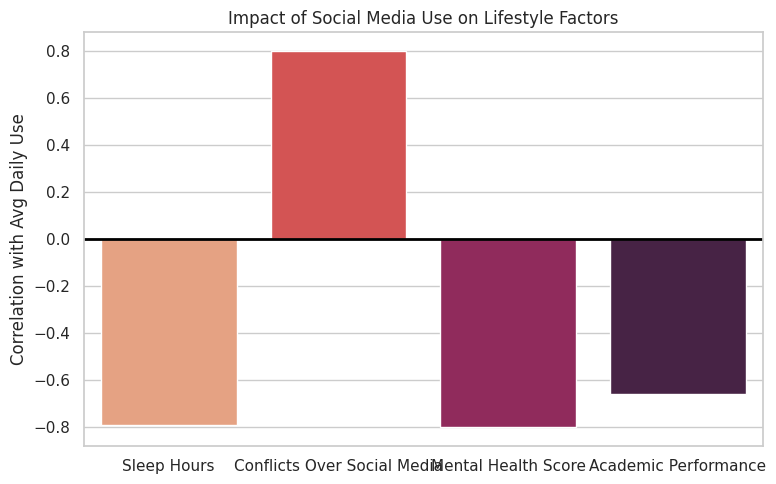

In [ ]:
#Runs through the lifestyle factors and relays their correlation
targets = ['Sleep_Hours_Per_Night', 'Conflicts_Over_Social_Media', 'Mental_Health_Score', 'Affects_Academic_Performance']
for t in targets:
    corr = df2['Avg_Daily_Usage_Hours'].corr(df2[t])
    print(t, corr)



sns.set_style('whitegrid')

correlations = {
    'Sleep Hours': -0.79,
    'Conflicts Over Social Media': 0.80,
    'Mental Health Score': -0.80,
    'Academic Performance': -0.66
}

plt.figure(figsize=(8,5))
sns.barplot(x=list(correlations.keys()), y=list(correlations.values()), palette='rocket_r')
plt.axhline(0, color='black', linewidth=2)
plt.ylabel('Correlation with Avg Daily Use')
plt.title('Impact of Social Media Use on Lifestyle Factors')
plt.tight_layout()
plt.show()

**Reports the correlation and p-value for all lifestyle factors** Shows a strong correlation between each factor

In [ ]:
from scipy.stats import pearsonr
import pandas as pd

# your target variables
targets = [
    'Sleep_Hours_Per_Night',
    'Conflicts_Over_Social_Media',
    'Mental_Health_Score',
    'Affects_Academic_Performance'
]

rows = []
for t in targets:
    r, p = pearsonr(df2['Avg_Daily_Usage_Hours'], df2[t])
    rows.append({'Factor': t, 'r (Correlation)': r, 'p-value': p})

# make into a nice DataFrame
results = pd.DataFrame(rows)

# add significance flag
results['Significant? (p<0.05)'] = results['p-value'] < 0.05
print(results.round(4))


                         Factor  r (Correlation)  p-value  \
0         Sleep_Hours_Per_Night          -0.7906      0.0   
1   Conflicts_Over_Social_Media           0.8046      0.0   
2           Mental_Health_Score          -0.8011      0.0   
3  Affects_Academic_Performance          -0.6615      0.0   

   Significant? (p<0.05)  
0                   True  
1                   True  
2                   True  
3                   True  


In [ ]:
#count unique values of platforms
high_levels = df[df['Addiction_Level'] == 'High']

platforms = high_levels['Most_Used_Platform'].value_counts().reset_index()
platforms.columns = ['Platform', 'Count']
platforms



,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Addiction_Level
0,1,19,Female,Undergraduate,Bangladesh,0.611765,Instagram,0,6.5,0.666667,In Relationship,3,8,2
1,2,22,Male,Graduate,India,0.247059,Twitter,1,7.5,0.888889,Single,0,3,0
2,3,20,Female,Undergraduate,USA,0.705882,TikTok,0,5.0,0.555556,Complicated,4,9,2
3,4,18,Male,High School,UK,0.352941,YouTube,1,7.0,0.777778,Single,1,4,0
4,5,21,Male,Graduate,Canada,0.529412,Facebook,0,6.0,0.666667,In Relationship,2,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,701,20,Female,Undergraduate,Italy,0.552941,TikTok,1,7.2,0.777778,In Relationship,2,5,1
701,702,23,Male,Graduate,Russia,0.800000,Instagram,0,5.9,0.444444,Single,5,9,2
702,703,21,Female,Undergraduate,China,0.658824,WeChat,0,6.7,0.666667,In Relationship,3,7,1
703,704,24,Male,Graduate,Japan,0.505882,Twitter,1,7.5,0.888889,Single,2,4,0


**Creats a bar chart showing the most popular platforms amoung students with high level of addiction**
This chart shows tiktok is the perfered platform

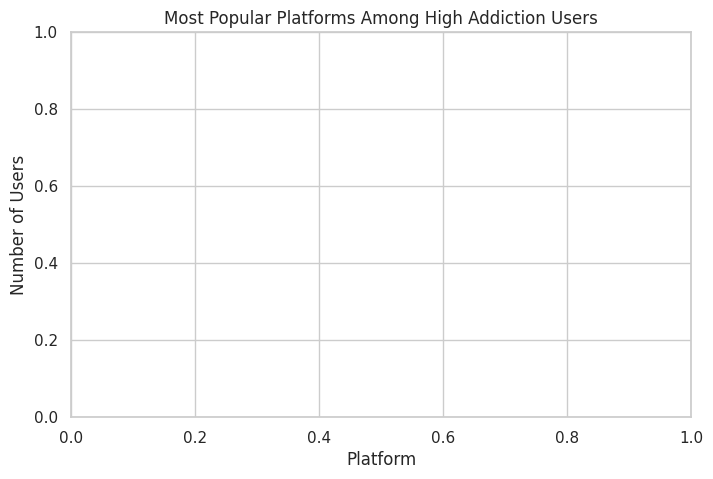

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Platform', y='Count', data=platforms, palette='rocket_r')
plt.title('Most Popular Platforms Among High Addiction Users')
plt.xlabel('Platform')
plt.ylabel('Number of Users')
plt.show()

**Create a pie chart to represent the ratio of genders with high levels of addiction**
This chart shows female students have a higher liklihood to be addicted to social media.

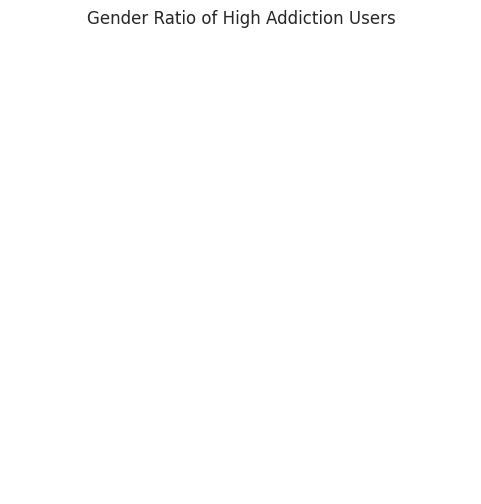

In [ ]:
#count the unique values of geder
genders = high_levels['Gender'].value_counts().reset_index()
genders.columns = ['Gender', 'Count']
genders

#plot the ratios of genders with high level of addiction
plt.figure(figsize=(6,6))
plt.pie(genders['Count'], labels=genders['Gender'], autopct='%1.1f%%',
        startangle=140, colors=sns.color_palette('rocket_r', len(genders)))
plt.title('Gender Ratio of High Addiction Users')
plt.show()